# Brain Tumor Detection - Dataset Preparation

## Include necessary libraries

We'll need the following libraries to prepare our dataset.

In [1]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
%matplotlib inline

## Extract the Dataset

Dataset taken from [this link](https://figshare.com/articles/brain_tumor_dataset/1512427), which consists of brain tumor images belonging to 3 classes of tumor along with other details present in .mat format.

In [2]:
if not os.path.exists('./dataset'):
  os.mkdir('./dataset')

Extract the dataset .zip file

In [3]:
with zipfile.ZipFile('./1512427.zip') as zf:
  zip_dir = zf.namelist()[0]
  zf.extractall('./dataset')

List the extracted files

In [4]:
!ls './dataset/'

README.txt			    brainTumorDataPublic_2299-3064.zip
brainTumorDataPublic_1-766.zip	    brainTumorDataPublic_767-1532.zip
brainTumorDataPublic_1533-2298.zip  cvind.mat


In [5]:
!cat './dataset/README.txt'

Extract all the 4 zip files of brain tumor, consisting .mat files

In [6]:
with zipfile.ZipFile('./dataset/brainTumorDataPublic_1-766.zip') as zf:
  os.mkdir('./dataset/bt_set1')
  zip_dir = zf.namelist()[0]
  zf.extractall('./dataset/bt_set1')

In [7]:
with zipfile.ZipFile('./dataset/brainTumorDataPublic_767-1532.zip') as zf:
  os.mkdir('./dataset/bt_set2')
  zip_dir = zf.namelist()[0]
  zf.extractall('./dataset/bt_set2')

In [8]:
with zipfile.ZipFile('./dataset/brainTumorDataPublic_1533-2298.zip') as zf:
  os.mkdir('./dataset/bt_set3')
  zip_dir = zf.namelist()[0]
  zf.extractall('./dataset/bt_set3')

In [9]:
with zipfile.ZipFile('./dataset/brainTumorDataPublic_2299-3064.zip') as zf:
  os.mkdir('./dataset/bt_set4')
  zip_dir = zf.namelist()[0]
  zf.extractall('./dataset/bt_set4')

Move the .mat files to a new folder named imageData

In [10]:
os.mkdir('./dataset/imageData')

In [11]:
!mv ./dataset/bt_set1/*.mat './dataset/imageData/'
!mv ./dataset/bt_set2/*.mat './dataset/imageData/'
!mv ./dataset/bt_set3/*.mat './dataset/imageData/'
!mv ./dataset/bt_set4/*.mat './dataset/imageData/'

## Prepare the Dataset

Let's look at the things that we have in a single .mat file. Display the images & contents present inside it.

In [12]:
arrays = {}
img = None

In [1]:
with h5py.File('./dataset/imageData/1.mat', 'r') as f:
    for key in f.keys():
      print(key)
    for item in f.items():
      print(item)
    for key, val in f['cjdata'].items():
      print(key, val)
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    img = img/127.5 - 1
    mask = np.array(mask, dtype=np.float32)
    mask = mask/127.5 - 1
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    fig = plt.figure(3)
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

NameError: name 'h5py' is not defined

A single .mat file consists of:

* **PID:** Patient ID for that particular tumor image. This is not a necessary feature.
* **image:** Image of the brain tumor
* **label:** Label between 1-3 denoting what kind of tumor is present
* **tumorBorder:** Coordinates of the tumor present in the image
* **tumorMask:** Masked version of the tumor.

We'll need the image, label, tumorBorder, tumorMask which are the necessary features that'll help us to detect brain tumors.

Create new folders named the following:

* **new_dataset:** We'll be using this folder to store our images, labels, mask and borders
* **bt_images:** We'll store the full brain tumor image in this folder
* **bt_mask:** We'll store the mask images of the brain tumor in this folder

In [14]:
os.mkdir('./new_dataset')
os.mkdir('./new_dataset/bt_images') 

Create empty lists for storing labels



In [15]:
labels = []


Save images of brain tumor, masks and store labels and borders in their respective lists iteratively.

3064 files successfully saved


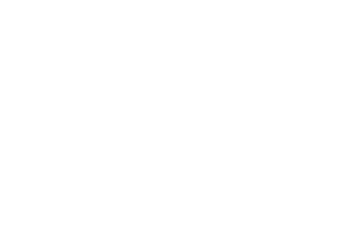

In [17]:
filename = None

border = []
for filename in range(1, 3065):
  with h5py.File('./dataset/imageData/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
     
     
      labels.append(int(label))
      
      border.append('coord')
      img = np.array(img, dtype=np.float32)
      
      plt.axis('off')
      plt.imsave("./new_dataset/bt_images/{}.jpg".format(filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))

Convert the Python lists to a Numpy arrays

In [18]:
label_names = np.array(labels, dtype=np.int64)


Check if the array has the right shape & length.

In [19]:
label_names.shape

(3065,)

Store the labels and tumor border (coordinates) as a pickle file, which can be loaded whenever we want to use it.

In [20]:
pickle_out = open("./new_dataset/labels.pickle","wb")                    
pickle.dump(label_names, pickle_out)
pickle_out.close() 

Create an empty list named 'training_data' in which we'll store our images and their respective labels as arrays

In [21]:
training_data = []
img = None
label = None
i = None

Read the images from bt_images folder from Google Drive and convert it to RGB images and store it along with their respective labels in the training_data list.

In [22]:
for i in range(1, 3065):
  img = cv2.imread("./new_dataset/bt_images/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = cv2.resize(img, (512, 512))
  label = label_names[i-1]
  training_data.append([img, label])

print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

pickle_out = open("./new_dataset/training_data.pickle","wb")                    
pickle.dump(training_data, pickle_out)
pickle_out.close()

shape: (512, 512, 3) label: 1 | 3064 samples successfully preprocessed


Store the training_data list as a pickle file